In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('clean_ibtrac.csv', low_memory=False) 

In [3]:
max_int = dataset.groupby('CycNo')['VMAX'].max().reset_index()

In [4]:
year_occur = dataset.groupby('CycNo')['YEAR'].agg(lambda x: stats.mode(x)[0][0]).reset_index()

In [5]:
dataset_useful = year_occur.merge(max_int, on ='CycNo', how='inner')

In [6]:
graph_data = dataset_useful.groupby(['YEAR'])['VMAX'].mean().reset_index()

In [7]:
graph_data['VMAX'] = graph_data['VMAX']*0.514444

In [8]:
graph_data['TIME'] = pd.to_datetime(graph_data['YEAR'], format='%Y')

In [9]:
graph_data2 = graph_data
graph_data2 = graph_data2.set_index('TIME')

graph_data2 = graph_data2.rolling(min_periods=9, window=9, center=True).mean()
graph_data2 = graph_data2.reset_index()

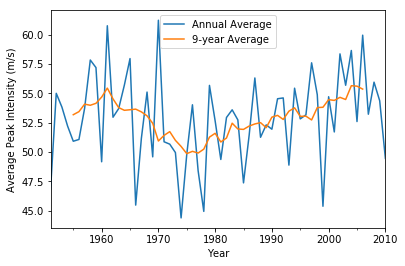

In [10]:
ax = graph_data.plot('TIME', 'VMAX', label='Annual Average')
plt.ylabel('Average Peak Intensity (m/s)')
graph_data2.plot('TIME', 'VMAX', ax=ax, label='9-year Average')
plt.xlabel('Year')
# plt.gcf().set_size_inches(10,10)
plt.show()

In [11]:
graph_data.to_csv('peak_int.csv',index=False)